# Getting Started Replaying Old Data

- Work under a separate branch with git (i.e. git checkout -b my-new-branch)

- Copy this ipynb file to a folder within your Projects folder - better not work within this (Projects_Templates/2_ReplayOldDataAsNF) folder. Come up with a nice name for the new folder.

- Then enter your new folder within Projects (maybe 3_New_Assignment_Fancy_Analysis), and use the code in here for for your purposes as you see fit

- you might wish to grab some data from Leipzig here: ldrive, under **Lab_MichaelB/Johan/nf/rawdata/ReplayDataTest**


- the main gist of re-playing existing data is:
    - that your first load everything into a big matrix with mne
    - then initialize a specific **amp** (i.e., the "replayamp")
    - then do exactly the same as normal, with a while True loop with calls to amp.get_data()
    
- you may wish to put all of the import statements at the top

- if you get a module not found error, add the mushu folder to the python path. A good analogy is the matlab's 'addpath' utility.


For example:
```python
sys.path.append('/home/nfcontrol/nf/nf-rtime/mushu/')      # this is to talk with the amplifer
sys.path.append('/home/nfcontrol/nf/nf-rtime/wyrm/') 
```


Not all of this code is useful! So remove the stuff you don't need, f.e. matplogib qt5, path appends, etc etc.

    
    




In [1]:
import time
import matplotlib

In [3]:
# %matplotlib qt5 --> ipympl
%matplotlib qt5

In [4]:
import sys
sys.path.append("../../mushu")
sys.path.append("../../mushu/libmushu")

import matplotlib

#import scipy
import numpy

In [5]:
# matplotlib.use('Qt5Agg')

import matplotlib.pyplot as plt

In [6]:
import mne

You will find this dataset in ldrive, under Lab_MichaelB/Johan/nf/rawdata/ReplayDataTest

But, you can also re-play any of the other data sets using mne's read brain vision plugin, too.


In [7]:
raw=mne.io.read_raw_eeglab('trio2_eoec_in-noscan_hpump-off.set')

The following EEG sensors did not have a position specified in the selected montage: ['EOG', 'ECG', 'CW1', 'CW2', 'CW3', 'CW4', 'CW5', 'CW6']. Their position has been left untouched.
Events like the following will be dropped entirely: ['eeo', 'bec', 'fl', 'eec', 'R'], 7 in total
558/864 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
96 events will be dropped because they occur on the same time sample as another event. `mne.io.Raw` objects store events on an event channel, which cannot represent two events on the same sample. You can extract the original event structure using `mne.io.eeglab.read_events_eeglab`. Then, you can e.g. subset the extracted events for constructing epochs.
Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file


<ipython-input-7-3c2aab250319>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['EOG', 'ECG', 'CW1', 'CW2', 'CW3', 'CW4', 'CW5', 'CW6']. Their position has been left untouched.
  raw=mne.io.read_raw_eeglab('trio2_eoec_in-noscan_hpump-off.set')
<ipython-input-7-3c2aab250319>:1: RuntimeWarning: Events like the following will be dropped entirely: ['eeo', 'bec', 'fl', 'eec', 'R'], 7 in total
  raw=mne.io.read_raw_eeglab('trio2_eoec_in-noscan_hpump-off.set')
<ipython-input-7-3c2aab250319>:1: RuntimeWarning: 558/864 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  raw=mne.io.read_raw_eeglab('trio2_eoec_in-noscan_hpump-off.set')
<ipython-input-7-3c2aab250319>:1: RuntimeWarning: 96 events will be dropped because they occur on the same time sample as another event. `mne.io.Raw` objects store events on an event channel, which cannot represent two events on the same sample. You can extr

In [8]:
m=raw[:,:][0]
m=numpy.array(m.transpose())
ch=raw.ch_names
fs=raw.info['sfreq']

In [1]:
import libmushu
amp = libmushu.get_amp('replayamp')

ModuleNotFoundError: No module named 'libmushu'

In [10]:
amp.configure(m, (), ch, fs, realtime=True, blocksize_samples=20)

In [11]:
amp.start()

Starting UDP server
Starting TCP server
starting...
stopping...


In [12]:
alld=[]
allm=[]
import time
starttime=time.time()
newtime=starttime
i=0;
while time.time() - starttime < 5:

    while time.time() - newtime < 0.5:
        pass
    else:
        data, marker = amp.get_data()
        alld.append(data)
        for m in marker:
            allm.append(marker)

        print('%d' % i, end='', flush=True)
        # print(data.shape)
        # print(marker)
        i+=1
        newtime+=0.5

0123456789

In [13]:
amp.stop()

amplifier stopped!


In [14]:
m=numpy.concatenate(alld)

In [15]:
m.shape

(9600, 39)

In [16]:
%matplotlib qt5
plt.figure()
plt.plot(m[:10000, 33:38])

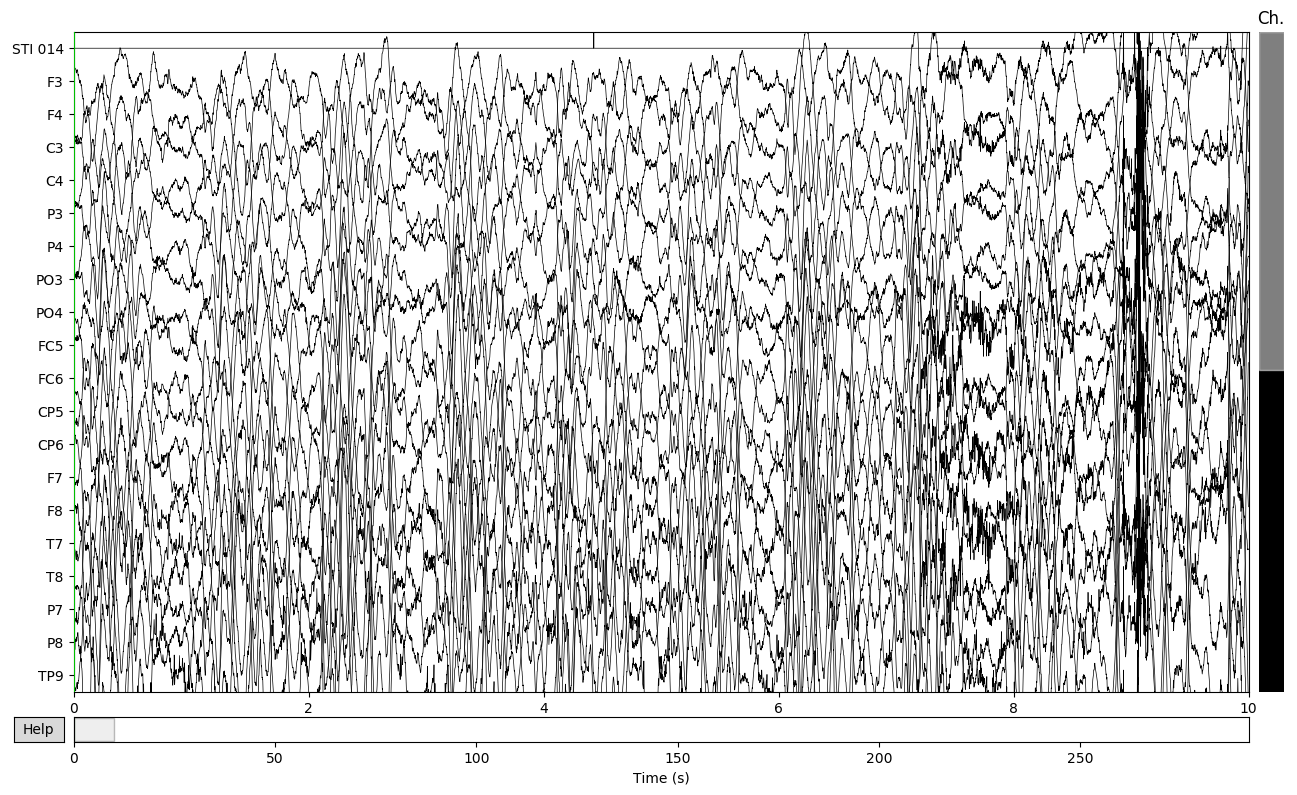

In [17]:
raw.plot()

## Done!


In [16]:
raw

<RawEEGLAB  |  None, n_channels x n_times : 39 x 291741 (291.7 sec), ~86.9 MB, data loaded>

In [17]:
raw.annotations